<a href="https://colab.research.google.com/github/Bansalpr/AI-powered-predictive-model-for-personalized-guidance-of-students-Original-/blob/main/Model_for_Student_Performance__Management__System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.3.2
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve


!pip install xgboost
from xgboost import XGBRegressor


import joblib
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
# Reading the csv file
data=pd.read_csv("/content/Preprocessed_studentperformance_data (1).csv")

In [ ]:
data

,Unnamed: 0,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance_bin
0,0,7,99,1,9,1,91,9
1,1,4,82,0,4,2,65,7
2,2,8,51,1,7,2,45,4
3,3,5,52,1,5,2,36,3
4,4,7,75,0,8,5,66,7
...,...,...,...,...,...,...,...,...
9868,9868,1,49,1,4,2,23,2
9869,9869,7,64,1,8,5,58,6
9870,9870,6,83,1,8,5,74,8
9871,9871,9,97,1,7,0,95,10


In [ ]:
df=data.drop(['Performance Index','Unnamed: 0'],axis=1)

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance_bin
0,7,99,1,9,1,9
1,4,82,0,4,2,7
2,8,51,1,7,2,4
3,5,52,1,5,2,3
4,7,75,0,8,5,7
...,...,...,...,...,...,...
9868,1,49,1,4,2,2
9869,7,64,1,8,5,6
9870,6,83,1,8,5,8
9871,9,97,1,7,0,10


In [ ]:
df.dropna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance_bin
0,7,99,1,9,1,9
1,4,82,0,4,2,7
2,8,51,1,7,2,4
3,5,52,1,5,2,3
4,7,75,0,8,5,7
...,...,...,...,...,...,...
9868,1,49,1,4,2,2
9869,7,64,1,8,5,6
9870,6,83,1,8,5,8
9871,9,97,1,7,0,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9873 non-null   int64
 1   Previous Scores                   9873 non-null   int64
 2   Extracurricular Activities        9873 non-null   int64
 3   Sleep Hours                       9873 non-null   int64
 4   Sample Question Papers Practiced  9873 non-null   int64
 5   Performance_bin                   9873 non-null   int64
dtypes: int64(6)
memory usage: 462.9 KB


<Axes: >

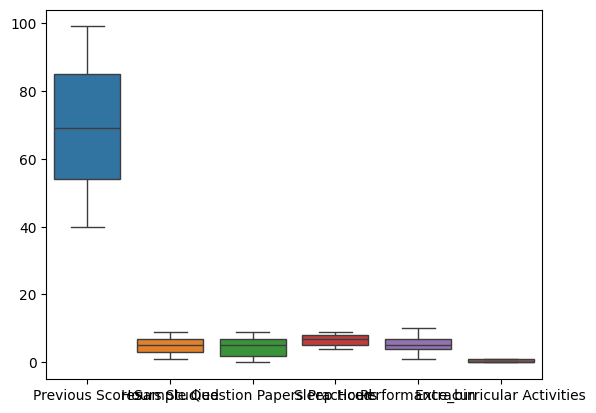

In [ ]:
plt.figure()
df=df[["Previous Scores","Hours Studied","Sample Question Papers Practiced","Sleep Hours","Performance_bin","Extracurricular Activities"]]
sns.boxplot(df)

**Feature scaling**

**1.Standardization(Z Score Normalization)  formula---> xi'=xi-x(mean)/S.D**

**2.Normalization**

In [ ]:
print(df.columns)

Index(['Previous Scores', 'Hours Studied', 'Sample Question Papers Practiced',
       'Sleep Hours', 'Performance_bin', 'Extracurricular Activities'],
      dtype='object')


In [ ]:
# Display the original dataset
print("Original Dataset:")
print(df)

# Define the min-max scaling function
def min_max_scale(column, new_min, new_max):
    """
    Scales a Pandas Series (column) to a specified range [new_min, new_max].

    Parameters:
        column (pd.Series): The data to be scaled.
        new_min (float): The minimum value of the scaled range.
        new_max (float): The maximum value of the scaled range.

    Returns:
        pd.Series: The scaled data.
    """
    old_min, old_max = column.min(), column.max()
    scaled_column = (column - old_min) * (new_max - new_min) / (old_max - old_min) + new_min
    return scaled_column

# Scale the 'Previous Scores' column to the range [0, 10]
df["Previous Scores_scaled"] = min_max_scale(df['Previous Scores'], 0, 10)

# Save the scaled dataset to a new CSV file
output_file_path = "scaled_data.csv"  # Replace with your desired output file path
df.to_csv(output_file_path, index=False)

# Display the scaled dataset
print("\nScaled Dataset:")
print(df)

Original Dataset:
      Previous Scores  Hours Studied  Sample Question Papers Practiced  \
0                  99              7                                 1   
1                  82              4                                 2   
2                  51              8                                 2   
3                  52              5                                 2   
4                  75              7                                 5   
...               ...            ...                               ...   
9868               49              1                                 2   
9869               64              7                                 5   
9870               83              6                                 5   
9871               97              9                                 0   
9872               74              7                                 1   

      Sleep Hours  Performance_bin  Extracurricular Activities  
0               9           

<ipython-input-10-a382d01beeed>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Previous Scores_scaled"] = min_max_scale(df['Previous Scores'], 0, 10)


In [ ]:
df.drop('Previous Scores',axis=1)

,Hours Studied,Sample Question Papers Practiced,Sleep Hours,Performance_bin,Extracurricular Activities,Previous Scores_scaled
0,7,1,9,9,1,10.000000
1,4,2,4,7,0,7.118644
2,8,2,7,4,1,1.864407
3,5,2,5,3,1,2.033898
4,7,5,8,7,0,5.932203
...,...,...,...,...,...,...
9868,1,2,4,2,1,1.525424
9869,7,5,8,6,1,4.067797
9870,6,5,8,8,1,7.288136
9871,9,0,7,10,1,9.661017


<Axes: >

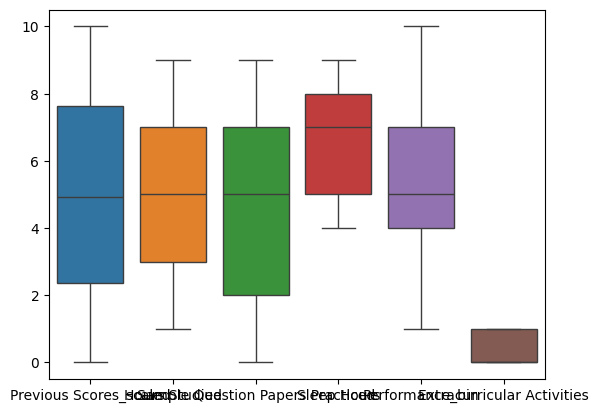

In [ ]:
plt.figure()
df=df[["Previous Scores_scaled","Hours Studied","Sample Question Papers Practiced","Sleep Hours","Performance_bin","Extracurricular Activities"]]
sns.boxplot(df)

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# """ # Load the dataset
# file_path = "input_data.csv"  # Replace with your actual CSV file path
# df = pd.read_csv(file_path)

# # Display dataset
# print("Dataset Preview:")
# print(df.head())"""

# # Define feature columns and target column
# features = ["Hours Studied", "Previous Scores_scaled",
#             "Sleep Hours", "Sample Question Papers Practiced","Extracurricular Activities"]
# target = "Performance_bin"

# # Split the data into features (X) and target (y)
# X = df[features]
# y = df[target]

# # Scale the features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# # Train a Random Forest Classifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("\nModel Accuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Predict on new user input
# def predict_performance(user_input):
#     """
#     Predicts the performance bin based on user input.

#     Parameters:
#         user_input (list): List of feature values in the order of `features`.

#     Returns:
#         str: Predicted performance bin.
#     """
#     user_input_scaled = scaler.transform([user_input])
#     prediction = model.predict(user_input_scaled)
#     return prediction[0]

# # Example user input for prediction
# # Format: [Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced]
# user_input = [7, 85, 4, 7, 5]
# predicted_bin = predict_performance(user_input)

# print("\nUser Input:", user_input)
# print("Predicted Performance Bin:", predicted_bin)


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# !pip install pandas scikit-learn fpdf
# from fpdf import FPDF

# """# Load the dataset
# file_path = "input_data.csv"  # Replace with your actual file path
# df = pd.read_csv(file_path)"""

# # Define feature columns and target column
# features = ["Hours Studied", "Previous Scores_scaled", "Extracurricular Activities",
#             "Sleep Hours", "Sample Question Papers Practiced"]
# target = "Performance_bin"

# # Split the data into features (X) and target (y)
# X = df[features]
# y = df[target]

# # Scale the features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# # Train a Random Forest Classifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("\nModel Accuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Define personalized guidance for each performance bin
# guidance_dict = {
#     "Excellent": "You are performing exceptionally well! Keep challenging yourself with advanced topics and maintain consistency.",
#     "Very Good": "Great job! Focus on areas where you can improve slightly to reach the next level.",
#     "Good": "You're doing well. Allocate more time to weak subjects and practice more frequently.",
#     "Average": "Identify your weak areas and work on them. Seek help from mentors or peers to improve steadily."
# }

# # Function to predict performance and generate personalized guidance
# def predict_and_generate_guidance(user_input, output_pdf_path):
#     """
#     Predicts the performance bin based on user input and generates a personalized guidance PDF.

#     Parameters:
#         user_input (list): List of feature values in the order of `features`.
#         output_pdf_path (str): Path to save the generated PDF.

#     Returns:
#         str: Predicted performance bin.
#     """
#     user_input_scaled = scaler.transform([user_input])
#     prediction = model.predict(user_input_scaled)[0]

#     # Fetch guidance for the predicted performance bin
#     guidance = guidance_dict.get(prediction, "No guidance available for this category.")

#     # Generate PDF with personalized guidance
#     pdf = FPDF()
#     pdf.add_page()
#     pdf.set_font("Arial", size=12)

#     # Add content to the PDF
#     pdf.cell(200, 10, txt="Personalized Guidance", ln=True, align='C')
#     pdf.ln(10)
#     pdf.cell(200, 10, txt=f"Predicted Performance: {prediction}", ln=True)
#     pdf.ln(10)
#     pdf.multi_cell(0, 10, txt=f"Guidance: {guidance}")

#     # Save the PDF
#     pdf.output(output_pdf_path)

#     return prediction

# # Example user input for prediction
# # Format: [Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced]
# user_input = [7, 85, 4, 7, 5]
# output_pdf_path = "personalized_guidance.pdf"
# predicted_bin = predict_and_generate_guidance(user_input, output_pdf_path)

# print("\nUser Input:", user_input)
# print("Predicted Performance Bin:", predicted_bin)
# print(f"Personalized guidance saved to {output_pdf_path}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving the model and scaler



# Define feature columns and target column
features = ["Hours Studied", "Previous Scores_scaled", "Extracurricular Activities",
            "Sleep Hours", "Sample Question Papers Practiced"]
target = "Performance_bin"

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the trained model and scaler
model_path = "performance_model.pkl"
#scaler_path = "scaler.pkl"

joblib.dump(model, model_path)
#joblib.dump(scaler, scaler_path)

print(f"Model saved to {model_path}")
#print(f"Scaler saved to {scaler_path}")



Model Accuracy: 0.7736708860759494

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.68      0.67        41
           2       0.78      0.74      0.76       137
           3       0.79      0.80      0.80       229
           4       0.79      0.80      0.80       300
           5       0.77      0.75      0.76       288
           6       0.75      0.76      0.76       296
           7       0.79      0.74      0.76       285
           8       0.76      0.86      0.81       234
           9       0.79      0.75      0.77       132
          10       0.77      0.61      0.68        33

    accuracy                           0.77      1975
   macro avg       0.76      0.75      0.76      1975
weighted avg       0.77      0.77      0.77      1975

Model saved to performance_model.pkl


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sentence-transformers, shap, sklearn-pandas, yellowbrick


In [ ]:
import joblib

# Load the saved model and scaler
model_path = "performance_model.pkl"
#scaler_path = "scaler.pkl"

model = joblib.load(model_path)
#scaler = joblib.load(scaler_path)

# Example user input
user_input = [[7, 85, 4, 7, 5]]  # Ensure this matches the feature order
#user_input_scaled = scaler.transform([user_input])
prediction = model.predict(user_input)[0]

print("Predicted Performance Bin:", prediction)


Predicted Performance Bin: 9


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# from flask import Flask, request, jsonify
# import joblib

# app = Flask(__name__)

# # Load the saved model and scaler
# model = joblib.load("performance_model.pkl")
# scaler = joblib.load("scaler.pkl")

# @app.route("/predict", methods=["POST"])
# def predict():
#     data = request.json
#     user_input = data.get("features")  # Expecting a list of feature values

#     if len(user_input) != 5:
#         return jsonify({"error": "Invalid input. Expected 5 features."}), 400

#     # Preprocess and predict
#     user_input_scaled = scaler.transform([user_input])
#     prediction = model.predict(user_input_scaled)[0]

#     return jsonify({"predicted_performance_bin": prediction})

# if __name__ == "__main__":
#     app.run(debug=True)


In [ ]:
#curl -X POST -H "Content-Type: application/json" -d '{"features": [7, 85, 4, 7, 5]}' http://127.0.0.1:5000/predict